In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [ ]:
train_data_dir = '/content/drive/MyDrive/yuvraj1'

# Set up the training data generator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='training')

# Set up the validation data generator
validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

# Set up the testing data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for testing to get predictions in order
)

Found 6218 images belonging to 4 classes.
Found 1553 images belonging to 4 classes.
Found 7771 images belonging to 4 classes.


In [ ]:
# Replace the existing model definition with DenseNet-121
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model and store the history
training_result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50
)

Epoch 1/50
194/194 [==============================] - 1617s 8s/step - loss: 0.1412 - accuracy: 0.9525 - val_loss: 0.7483 - val_accuracy: 0.8190
Epoch 2/50
194/194 [==============================] - 78s 401ms/step - loss: 0.0398 - accuracy: 0.9871 - val_loss: 0.4485 - val_accuracy: 0.8789
Epoch 3/50
194/194 [==============================] - 77s 396ms/step - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0701 - val_accuracy: 0.9740
Epoch 4/50
194/194 [==============================] - 78s 402ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.1135 - val_accuracy: 0.9635
Epoch 5/50
194/194 [==============================] - 77s 395ms/step - loss: 0.0530 - accuracy: 0.9829 - val_loss: 0.2288 - val_accuracy: 0.9349
Epoch 6/50
194/194 [==============================] - 77s 398ms/step - loss: 0.0286 - accuracy: 0.9905 - val_loss: 0.1058 - val_accuracy: 0.9785
Epoch 7/50
194/194 [==============================] - 78s 402ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.1294 - val_acc

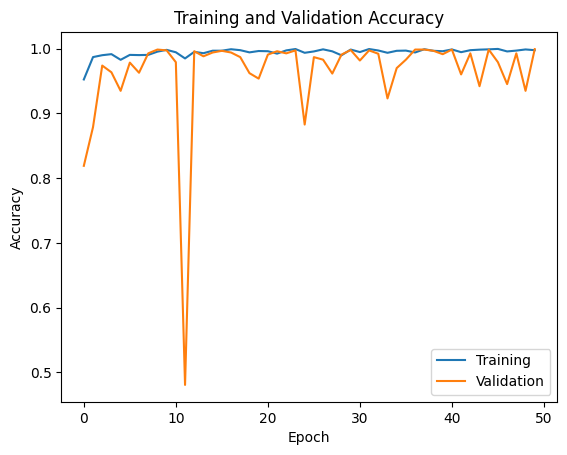

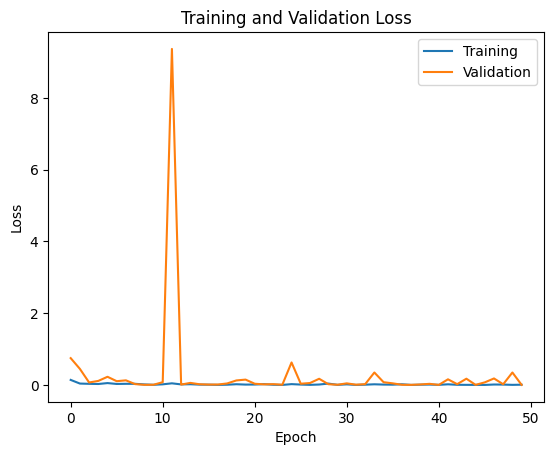

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(training_result.history['accuracy'])
plt.plot(training_result.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()


# Plot the training and validation loss
plt.plot(training_result.history['loss'])
plt.plot(training_result.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

In [ ]:
# Evaluate on training data
training_accuracy = model.evaluate(train_generator)[1]
print(f'Training Accuracy: {training_accuracy * 100:.2f}%')

# Evaluate on validation data
validation_accuracy = model.evaluate(validation_generator)[1]
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')

# Evaluate on testing data
testing_accuracy = model.evaluate(test_generator)[1]
print(f'Testing Accuracy: {testing_accuracy * 100:.2f}%')

195/195 [==============================] - 26s 133ms/step - loss: 4.2160e-04 - accuracy: 0.9998
Training Accuracy: 99.98%
49/49 [==============================] - 8s 166ms/step - loss: 0.0034 - accuracy: 0.9994
Validation Accuracy: 99.94%
243/243 [==============================] - 31s 128ms/step - loss: 0.0010 - accuracy: 0.9997
Testing Accuracy: 99.97%
